# 11월 26일 금 공부

## 7. 머신러닝 프로세스4 : 모델훈련과 세부 튜닝

### 7.1 데이터 불러오기 및 데이터 셋 분할

In [2]:
# warning 제거
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 데이터 불러오기
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/Fvote.csv', encoding='utf-8')

In [4]:
# X 와 y 분할
X = data[data.columns[1:13]]
y = data[['vote']]

In [5]:
# train-test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

### 7.2 Grid Search

In [10]:
# 그리드 탐색을 위한 라이브러리 임포트
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 모델 불러옴
from sklearn.linear_model import LogisticRegression

# GridSearchCV 설정
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)

# 그리드 서치를 데이터에 fit 시킴
grid_search.fit(X_train, y_train)

# .best_params_ : 정확도가 가장 높은 하이퍼파라미터 구하기
print("Best Parameter : {}".format(grid_search.best_params_))

# .best_score_ : 가장 높은 정확도 구하기
print("Best Cross-validity Score : {:3f}".format(grid_search.best_score_))

# 테스트 데이터에 그리드 서치 적용
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter : {'C': 10}
Best Cross-validity Score : 0.727419
Test set Score: 0.679


In [9]:
# 테스트 데이터에 그리드 서치 적용
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.679


In [12]:
# .cv_results_ : 그리드서치 하이퍼파라미터 별, cross validation 별 상세 결과 값 보기
# df 형태로 변화 필요
result_grid=pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007181,0.002555,0.001767,0.000420,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.003624,0.000655,0.000970,0.000117,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.004246,0.000207,0.000773,0.000003,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
3,0.006182,0.000292,0.000773,0.000003,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,...,0.714919,0.079466,4,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
4,0.007900,0.000885,0.000769,0.000003,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.009355,0.000863,0.000766,0.000003,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


In [20]:
result_grid.loc[:,'param_C':'split4_test_score']

,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,0.709677
1,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,0.709677
2,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,0.774194
3,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,0.806452
4,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,0.806452
5,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,0.806452


In [24]:
result_grid[['param_C', 'split0_train_score','split1_train_score','split2_train_score','split3_train_score','split4_train_score']]

,param_C,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score
0,0.001,0.714286,0.706349,0.706349,0.708661,0.708661
1,0.01,0.714286,0.706349,0.706349,0.708661,0.708661
2,0.1,0.738095,0.746032,0.738095,0.740157,0.716535
3,1,0.738095,0.793651,0.730159,0.763780,0.724409
4,10,0.746032,0.769841,0.730159,0.779528,0.724409
5,100,0.746032,0.769841,0.730159,0.771654,0.724409


In [13]:
result_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       6 non-null      float64
 1   std_fit_time        6 non-null      float64
 2   mean_score_time     6 non-null      float64
 3   std_score_time      6 non-null      float64
 4   param_C             6 non-null      object 
 5   params              6 non-null      object 
 6   split0_test_score   6 non-null      float64
 7   split1_test_score   6 non-null      float64
 8   split2_test_score   6 non-null      float64
 9   split3_test_score   6 non-null      float64
 10  split4_test_score   6 non-null      float64
 11  mean_test_score     6 non-null      float64
 12  std_test_score      6 non-null      float64
 13  rank_test_score     6 non-null      int32  
 14  split0_train_score  6 non-null      float64
 15  split1_train_score  6 non-null      float64
 16  split2_train

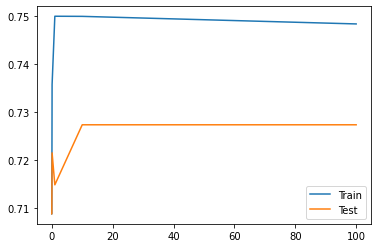

In [25]:
# 도표 그리기
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

### 7.3 Random Search

In [27]:
# Random Search 임포트
from sklearn.model_selection import RandomizedSearchCV

# 난수생성 임포트
from scipy.stats import randint

# 하이퍼파라미터 생성
param_distribs = {'C': randint(low=0.001, high=100)}

# 모델 적용
from sklearn.linear_model import LogisticRegression

# 랜덤서치 적용
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distribs, cv=5, return_train_score=True)

# .fit : train 데이터에 대해 수행
random_search.fit(X_train,y_train)

# train 데이터에 대해 가장 성능이 좋은 하이퍼파라미터 값 찾기
print("Best Parameter: {}".format(random_search.best_params_))

# train 데이터에 대해 가장 높은 성능 점수 출력
print("Best Cross-validity Score : {:.3f}".format(random_search.best_score_))

# test 데이터에 랜덤서치 적용해서 점수 출력
print("Test set Score : {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'C': 67}
Best Cross-validity Score : 0.727
Test set Score : 0.679


In [29]:
# 랜덤 탐색의 하이퍼파라미터별, cv 별 상세 결과 값을 보기
result_random = random_search.cv_results_

# df 형태로 변환 필요
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011774,0.002924,0.000985,0.000132,67,{'C': 67},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
1,0.009430,0.000866,0.000803,0.000008,47,{'C': 47},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
2,0.008950,0.000828,0.000805,0.000005,9,{'C': 9},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
3,0.009508,0.000782,0.000799,0.000007,30,{'C': 30},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
4,0.009491,0.000956,0.000815,0.000010,28,{'C': 28},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
5,0.009182,0.001048,0.000804,0.000006,8,{'C': 8},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
6,0.009945,0.000730,0.000802,0.000008,74,{'C': 74},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
7,0.009177,0.000993,0.000801,0.000005,29,{'C': 29},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
8,0.009785,0.000802,0.000800,0.000006,77,{'C': 77},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
9,0.009853,0.000517,0.000801,0.000004,81,{'C': 81},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


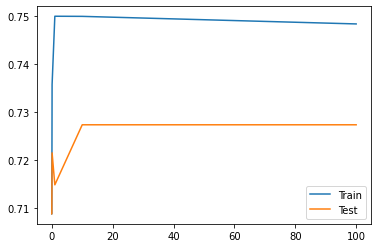

In [32]:
# 도표 그리기
import matplotlib.pyplot as plt
plt.plot(result_grid["param_C"], result_grid["mean_train_score"], label="Train")
plt.plot(result_grid["param_C"], result_grid["mean_test_score"], label="Test")
plt.legend()

## 8. 머신러닝 프로세스 5 : 모델평가

In [33]:
Final_model = LogisticRegression(C=10)
Final_model.fit(X_train,y_train)

LogisticRegression(C=10)

In [36]:
# 정확도

#훈련데이터
pred_train = Final_model.predict(X_train)
print("훈련데이터 정확도 : ", Final_model.score(X_train, y_train))

#테스트데이터
pred_test = Final_model.predict(X_test)
print("테스트데이터 정확도 : " , Final_model.score(X_test, y_test))

훈련데이터 정확도 :  0.740506329113924
테스트데이터 정확도 :  0.6792452830188679


In [41]:
# 혼돈행렬
from sklearn.metrics import confusion_matrix

#훈련데이터
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬 : \n" , confusion_train)

#테스트데이터
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬 : \n" , confusion_test)

훈련데이터 오차행렬 : 
 [[ 12  34]
 [  7 105]]
테스트데이터 오차행렬 : 
 [[ 3 12]
 [ 5 33]]


In [43]:
# 분류 예측 레포트
from sklearn.metrics import classification_report

#훈련데이터
cfreport_train = classification_report(y_train, pred_train)
print("훈련 데이터 분류 예측 레포트 : \n" , cfreport_train)

#테스트데이터
cfreport_test = classification_report(y_test, pred_test)
print("테스트 데이터 분류 예측 레포트 : \n", cfreport_test)

훈련 데이터 분류 예측 레포트 : 
               precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158

테스트 데이터 분류 예측 레포트 : 
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



In [46]:
# ROC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate , thresholds = roc_curve(y_test, Final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test, Final_model.decision_function(X_test))
roc_auc

0.6350877192982456

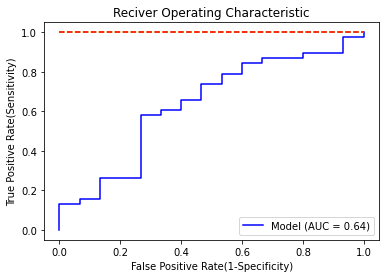

In [48]:
# ROC 도표그리기
import matplotlib.pyplot as plt
plt.title("Reciver Operating Characteristic")
plt.xlabel("False Positive Rate(1-Specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[1,1],'r--')

plt.legend(loc='lower right')
plt.show()

## 9. 머신러닝 프로세스 6 : 다중분류

In [58]:
# 경고 무시
import warnings
warnings.filterwarnings("ignore")

# 데이터 불러오기
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/Fvote.csv', encoding='utf-8')

# X 와 Y 특성치 나누기
X = data[data.columns[1:13]]
y = data[['parties']]

# train-test 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

# 모델 불러오기
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# 훈련 데이터 예측범주 저장 및 정확도 
pred_train = model.predict(X_train)
print("훈련 데이터 정확도 : ", model.score(X_train, y_train))

# 테스트 데이터 예측범주 저장 및 정확도
pred_test = model.predict(X_test)
print("테스트 데이터 정확도 : ", model.score(X_test, y_test))

# 모델 성능평가
# 혼돈행렬
from sklearn.metrics import confusion_matrix

#훈련데이터 혼돈행렬
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련 데이터 혼돈 행렬 : \n ", confusion_train)

#테스트데이터 혼돈행렬
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 혼돈 행렬 : \n", confusion_test)

#파라미터 튜닝 - gridsearch
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print("그리드서치 \n")
print("Best Parameter : {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {}".format(grid_search.score(X_test,y_test)))

#파라미터 튜닝 - random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'C': randint(low=0.001, high=100)}
random_search=RandomizedSearchCV(LogisticRegression(), param_distributions=param_distribs, cv=5, n_iter=100, return_train_score=True)
random_search.fit(X_train, y_train)

print("랜덤서치 \n")
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score : {:.3f}".format(random_search.best_score_))
print("Test set Score: {}".format(random_search.score(X_test, y_test)))

훈련 데이터 정확도 :  0.6139240506329114
테스트 데이터 정확도 :  0.5283018867924528
훈련 데이터 혼돈 행렬 : 
  [[21  2  3 11]
 [ 1 25  2 12]
 [ 6  2  5  6]
 [ 7  8  1 46]]
테스트 데이터 혼돈 행렬 : 
 [[ 6  1  2  4]
 [ 1  9  1  2]
 [ 1  2  1  2]
 [ 2  5  2 12]]
그리드서치 

Best Parameter : {'C': 0.1}
Best Cross-validity Score: 0.544
Test set Score: 0.5849056603773585
랜덤서치 

Best Parameter: {'C': 4}
Best Cross-validity Score : 0.544
Test set Score: 0.5094339622641509


In [59]:
y.value_counts()

parties
4          83
2          53
1          50
3          25
dtype: int64